<a href="https://colab.research.google.com/github/keerthucit/EIP2Assignment/blob/master/Assignment5_New.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
pip install git+https://github.com/qubvel/classification_models.git

  Cloning https://github.com/qubvel/classification_models.git to /tmp/pip-req-build-pzy1lezi
  Running command git clone -q https://github.com/qubvel/classification_models.git /tmp/pip-req-build-pzy1lezi
  Running command git submodule update --init --recursive -q
  Stored in directory: /tmp/pip-ephem-wheel-cache-7h5bazoc/wheels/de/2b/fd/29a6d33edb8c28bc7d94e95ea1d39c9a218ac500a3cfb1b197
Successfully built image-classifiers


In [0]:
## Load the trained RESNET-18 model [ Change the input to CIFAR-10 input (32,32,3) instead of (224,224,3)]\n",
from classification_models.resnet import ResNet18, preprocess_input       
model = ResNet18((32, 32, 3), weights='imagenet', classes=10, include_top=False)


In [0]:
!pip install -q keras
import keras
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.layers import MaxPooling2D,Activation,GlobalAveragePooling2D
n_classes = 10  
x = GlobalAveragePooling2D()(model.output)
# add a fully-connected layer
x = keras.layers.Dense(1024, activation='relu')(x)       
output = keras.layers.Dense(n_classes, activation='softmax')(x)
model = keras.models.Model(inputs=[model.input], outputs=[output])

In [0]:
from keras.utils import np_utils
nb_classes = 10
# load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
y_train = y_train.reshape(y_train.shape[0]) 
 # somehow y_train comes as a 2D nx1 matrix\n",
y_test = y_test.reshape(y_test.shape[0])
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255 
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)


In [0]:
## Pls check this link:- https://stackoverflow.com/questions/49259361/valueerror-decode-predictions-expects-a-batch-of-predictions-i-e-a-2d-array"

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
# compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#create data generator
datagen = ImageDataGenerator(
featurewise_center=False,  # set input mean to 0 over the dataset
samplewise_center=False,  # set each sample mean to 0
featurewise_std_normalization=False,  # divide inputs by std of the dataset
samplewise_std_normalization=False,  # divide each input by its std
zca_whitening=False,  # apply ZCA whitening
rotation_range=45,  # randomly rotate images in the range (degrees, 0 to 180)
width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
horizontal_flip=True,  # randomly flip images
vertical_flip=False)  # randomly flip images   
# prepare iterator
it_train=datagen.flow(X_train, Y_train, batch_size=32)
it_test=datagen.flow(X_test, Y_test, batch_size=32)    
filepath="/content/gdrive/My Drive/Restnet18_PreTrained.hdf5"
mcp_save = keras.callbacks.ModelCheckpoint(filepath, save_best_only=True, monitor='val_loss', mode='min')     
steps = int(X_train.shape[0] / 32)
model_details = model.fit_generator(it_train, steps_per_epoch=steps, epochs=10, verbose=2, validation_data=it_test, validation_steps=len(it_test), callbacks=[mcp_save]),
# Score trained model.
scores = model.evaluate_generator(it_test, steps=len(it_test), verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Epoch 1/10
 - 2126s - loss: 1.2369 - acc: 0.5725 - val_loss: 1.1833 - val_acc: 0.5902
Epoch 2/10
 - 2128s - loss: 1.0785 - acc: 0.6288 - val_loss: 1.0761 - val_acc: 0.6281
Epoch 3/10
 - 2097s - loss: 0.9922 - acc: 0.6581 - val_loss: 0.9611 - val_acc: 0.6678
Epoch 4/10
 - 2111s - loss: 0.9376 - acc: 0.6804 - val_loss: 0.9337 - val_acc: 0.6803
Epoch 5/10
 - 2089s - loss: 0.8953 - acc: 0.6921 - val_loss: 0.9524 - val_acc: 0.6726
Epoch 6/10
 - 2095s - loss: 0.8542 - acc: 0.7051 - val_loss: 0.8311 - val_acc: 0.7139
Epoch 7/10
 - 2089s - loss: 0.8516 - acc: 0.7065 - val_loss: 0.9006 - val_acc: 0.6966
Epoch 8/10
 - 2099s - loss: 0.8100 - acc: 0.7227 - val_loss: 0.8819 - val_acc: 0.6953
Epoch 9/10
 - 2095s - loss: 0.7946 - acc: 0.7260 - val_loss: 0.8886 - val_acc: 0.6948
Epoch 10/10
 - 2105s - loss: 0.7726 - acc: 0.7330 - val_loss: 0.7682 - val_acc: 0.7347
313/313 [==============================] - 35s 112ms/step
Test loss: 0.7870596500396728
Test accuracy: 0.7275


In [0]:
predictions = model.predict([X_test])
y_class = predictions.argmax(axis=-1)

In [0]:
import numpy as np
correct_indices = np.nonzero(y_class == y_test)[0]
incorrect_indices = np.nonzero(y_class != y_test)[0]
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified Incorrectly")


7427  classified correctly
2573  classified Incorrectly


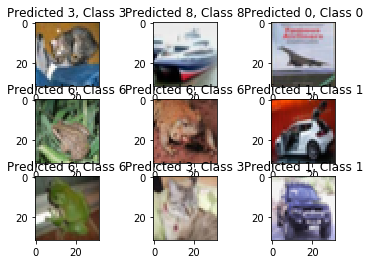

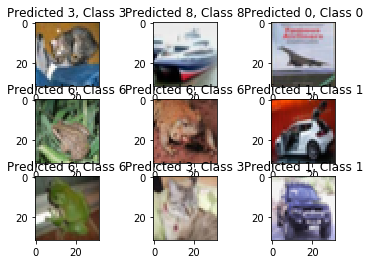

<Figure size 432x288 with 0 Axes>

In [0]:
examples_per_class = 8
y_test_pred= y_class
### class_name = {0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}
## Just for reference
import matplotlib.pyplot as plt
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
  plt.subplot(3, 3, i + 1)
  plt.imshow(X_test[correct].reshape(32,32,3), interpolation='none')
  plt.title("Predicted {}, Class {}".format(y_class[correct], y_test[correct]))
plt.figure()
for i, incorrect in enumerate(correct_indices[:9]):
  plt.subplot(3, 3, i + 1)
  plt.imshow(X_test[incorrect].reshape(32,32,3), interpolation='none')
  plt.title("Predicted {}, Class {}".format(y_class[incorrect], y_test[incorrect]))
plt.figure()
plt.show()

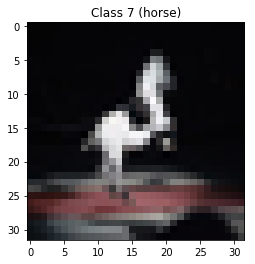

In [64]:
nb_classes = 10
class_name = {0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}
def draw_img(i):
  im = X_train[i]
  c = y_train[i]
  plt.imshow(im)
  plt.title("Class %d (%s)" % (c, class_name[c]))
  plt.axis('on')
  plt.savefig(str(class_name[c])+'.png')
draw_img(11231)
draw_img(231)
draw_img(123)
draw_img(321)
            

In [65]:
!ls

bird.png  cat.png  frog.png  gdrive  horse.png	sample_data


In [66]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
bn_data (BatchNormalization)    (None, 32, 32, 3)    9           data[0][0]                       
__________________________________________________________________________________________________
zero_padding2d_19 (ZeroPadding2 (None, 38, 38, 3)    0           bn_data[0][0]                    
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, 16, 16, 64)   9408        zero_padding2d_19[0][0]          
__________________________________________________________________________________________________
bn0 (Batch

In [68]:
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing import image
import keras.backend as K
import cv2
img_path_list = ['/content/horse.png','/content/bird.png','/content/cat.png','/content/frog.png']
print(img_path_list)
for i in range(len(img_path_list)):
    img_path = img_path_list[i]
    img = image.load_img(img_path, target_size=(32, 32))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    
preds = model.predict(x)
class_idx = np.argmax(preds[0])
class_output = model.output[:, class_idx]
last_conv_layer = model.get_layer("zero_padding2d_11")

grads = K.gradients(class_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])
for i in range(10):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
    
heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
from google.colab.patches import cv2_imshow
img = cv2.imread(img_path)
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
numpy_horizontal_concat = np.concatenate((img, superimposed_img), axis=1)
cv2_imshow(numpy_horizontal_concat)

['/content/horse.png', '/content/bird.png', '/content/cat.png', '/content/frog.png']


ValueError: ignored

0 1000
1 1000
2 1000
3 1000
4 1000
5 1000
6 1000
7 1000
8 1000
9 1000
[[793  48  16  10  15   1   6   4  61  46]
 [  4 919   0   1   0   1   5   2  13  55]
 [ 75  25 711  23  27  25  84   8  13   9]
 [ 15  42  76 548  36  78 126  20  27  32]
 [ 16   7 124  22 573   5 202  38   7   6]
 [  8  34  71 142  25 572  95  21  15  17]
 [  1  20  24  23  10   1 900   4   8   9]
 [ 12  23  49  40  60  33  39 717   8  19]
 [ 54  45   5   1   5   0   9   1 859  21]
 [ 22 105   2   3   0   1  11   3  18 835]]


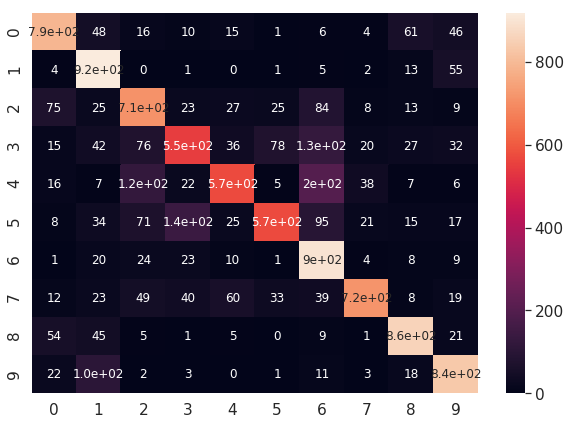

In [69]:
#### Confusion Matrix (Add elements along the diagonal = No of correctly classified images)
from sklearn.metrics import classification_report, confusion_matrix
for ix in range(10):
   print(ix, confusion_matrix(np.argmax(Y_test,axis=1),y_class)[ix].sum())
cm = confusion_matrix(np.argmax(Y_test,axis=1),y_class)
print(cm)
# Visualizing of confusion matrix
import seaborn as sn
import pandas  as pd
df_cm = pd.DataFrame(cm, range(10), range(10))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12})# font size
plt.show()